In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 1 :- data load

data = pd.read_csv('/kaggle/input/university-admission-trends-database/university_admission_trends_dataset.csv')
print(data.head())


     ID Category        Date  Admission Score  Acceptance Rate (%)     Label
0  ID_1   Type B  2018-01-01              737               227.39   Neutral
1  ID_2   Type B  2018-01-02              821               489.67  Positive
2  ID_3   Type D  2018-01-03              525               154.81  Negative
3  ID_4   Type C  2018-01-04              459                90.67   Neutral
4  ID_5   Type C  2018-01-05              385               427.62  Positive


In [28]:
# Clean the data
data = data.dropna()

#  Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#check for duplicate rows
data = data.drop_duplicates()

#validate data types
print(data.dtypes)

ID                             object
Category                       object
Date                   datetime64[ns]
Admission Score                 int64
Acceptance Rate (%)           float64
Label                          object
dtype: object


In [29]:
# **********Explore the data **

# 1. Basic information of Dataset
print(data.info())

# 2. Get a summary of the data
print(data.describe())


#  3. chack for missing values
print(data.isnull().sum())

#  4. Unique values in lable & category columns
print("Unique labels : ", data['Label'].unique())
print("Unique Categorys : ", data['Category'].unique())

#  5. Average value of admission score
average_score = data['Admission Score'].mean()
print( "Average Admission Score :" , average_score )

## 6. groupby

total_score = data.groupby('Category')['Admission Score'].sum()
print(total_score)

max_score = data.groupby('Category')['Admission Score'].max()
print(max_score)

min_score = data.groupby('Category')['Admission Score'].min()
print(min_score)

average_rate = data.groupby('Category')['Acceptance Rate (%)'].mean()
print(average_rate)

total_rate = data.groupby('Label')['Acceptance Rate (%)'].sum() 
print(total_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1000 non-null   object        
 1   Category             1000 non-null   object        
 2   Date                 1000 non-null   datetime64[ns]
 3   Admission Score      1000 non-null   int64         
 4   Acceptance Rate (%)  1000 non-null   float64       
 5   Label                1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB
None
                      Date  Admission Score  Acceptance Rate (%)
count                 1000      1000.000000          1000.000000
mean   2019-05-15 12:00:00       505.336000           256.122490
min    2018-01-01 00:00:00         2.000000            10.200000
25%    2018-09-07 18:00:00       252.000000           132.695000
50%    2019-05-15 12:00:00 

In [30]:
# 7 : Monthly admission trends
data['Month'] = data['Date'].dt.month
monthly_trends = data.groupby('Month')['Admission Score'].sum()
print(monthly_trends)

Month
1     48232
2     44735
3     49975
4     47323
5     45854
6     37126
7     44471
8     45446
9     44307
10    36415
11    31687
12    29765
Name: Admission Score, dtype: int64


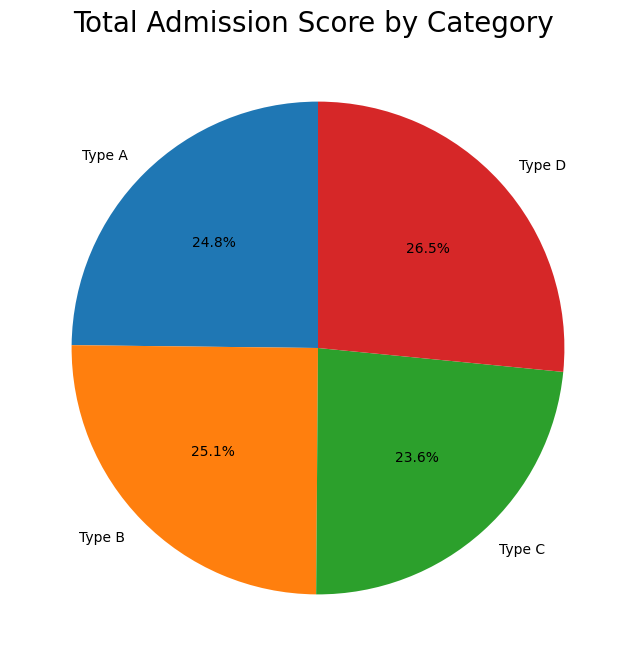

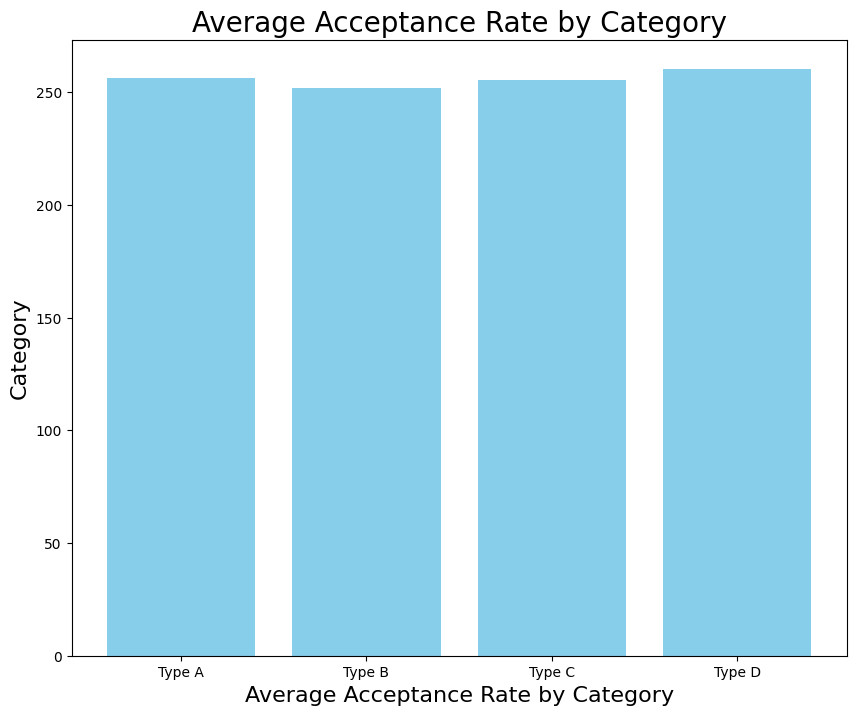

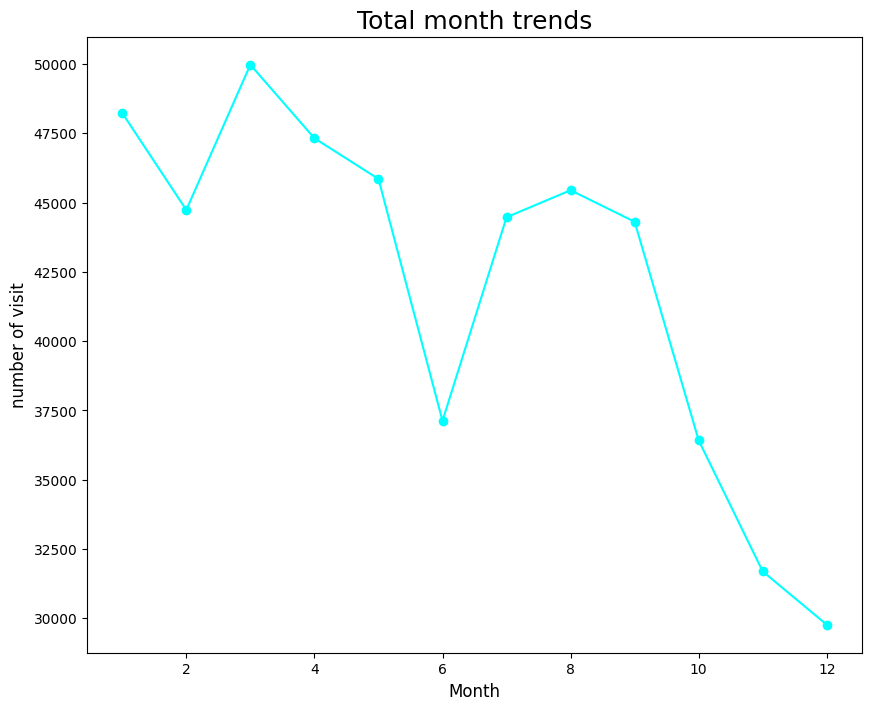

In [33]:
#Visualization
plt.figure(figsize=(10,8))
plt.pie(total_score.values, labels=total_score.index, autopct= '%1.1f%%', startangle = 90)
plt.title('Total Admission Score by Category ', fontsize= 20)
plt.show()

## Barchat
plt.figure(figsize=(10,8))
plt.bar(average_rate.index, average_rate.values, color= 'SkyBlue')
plt.title("Average Acceptance Rate by Category", fontsize=20 )
plt.xlabel("Average Acceptance Rate by Category", fontsize=16)
plt.ylabel("Category", fontsize=16)
plt.show()

## plot chat
plt.figure(figsize=(10, 8))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', color='Aqua')
plt.title("Total month trends", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of visit", fontsize=12)
plt.show()

